Домашнее задание номер 5 по курсу "Методы визуализации данных".

Выполнил Лазичный Иван Александрович, группа М05-012б

В данном задании я реализовал алгоритм Radial Drawing, он занял у меня больше кода на выполнение первого задания, поэтому я посчитал его нетривиальным для задачи по выбору. Так же он занимает столько же страниц в описании как и HW-укладка
 

In [1]:
import networkx as nx
from networkx.readwrite.graphml import read_graphml
import math

In [2]:
!wget https://raw.githubusercontent.com/Ivanlasich/visualisation_methods-/main/task5/tree_complex.xml

--2021-04-18 23:52:06--  https://raw.githubusercontent.com/Ivanlasich/visualisation_methods-/main/task5/tree_complex.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4594 (4.5K) [text/plain]
Saving to: ‘tree_complex.xml’

tree_complex.xml    100%[===================>]   4.49K  --.-KB/s    in 0s      

2021-04-18 23:52:06 (52.1 MB/s) - ‘tree_complex.xml’ saved [4594/4594]



In [3]:
example = read_graphml('tree_complex.xml')

In [4]:
nodes = [int(i[1:]) for i in list(example.nodes)]
edges={}
for node in list(example.nodes):
  edges[int(node[1:])]=[int(i[1:]) for i in example.neighbors(node)]

In [5]:
vertexs = edges.keys() 
print(vertexs)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70])


In [6]:
def get_num_child(v):
  if(used[v]==1):
    return 
  used[v]=1
  num = 0
  for edge in edges[v]:
    if(used[edge]!=1):
      num+=get_num_child(edge)
  num +=1
  count_childs[v]=num
  return num

def get_depth(v, d):
  depth[v] = d
  d+=1
  for edge in edges[v]:
    get_depth(edge, d)

In [7]:
used = {vertex:0 for vertex in vertexs}
count_childs = {vertex:0 for vertex in vertexs}
depth = {vertex:0 for vertex in vertexs}
for i in vertexs:
  get_num_child(i)

get_depth(0, 0)

print(count_childs)
print(depth)

{0: 71, 1: 56, 2: 36, 3: 23, 4: 1, 5: 21, 6: 6, 7: 10, 8: 11, 9: 4, 10: 3, 11: 3, 12: 6, 13: 1, 14: 1, 15: 2, 16: 1, 17: 2, 18: 3, 19: 5, 20: 4, 21: 10, 22: 6, 23: 2, 24: 1, 25: 3, 26: 1, 27: 3, 28: 1, 29: 2, 30: 2, 31: 3, 32: 1, 33: 1, 34: 1, 35: 2, 36: 1, 37: 1, 38: 1, 39: 1, 40: 2, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 14, 53: 1, 54: 2, 55: 1, 56: 1, 57: 1, 58: 3, 59: 10, 60: 1, 61: 1, 62: 9, 63: 4, 64: 4, 65: 3, 66: 1, 67: 1, 68: 3, 69: 2, 70: 1}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 2, 5: 4, 6: 5, 7: 3, 8: 2, 9: 6, 10: 5, 11: 3, 12: 4, 13: 2, 14: 6, 15: 2, 16: 3, 17: 3, 18: 5, 19: 3, 20: 2, 21: 5, 22: 6, 23: 6, 24: 6, 25: 7, 26: 8, 27: 4, 28: 5, 29: 5, 30: 4, 31: 3, 32: 6, 33: 6, 34: 3, 35: 7, 36: 7, 37: 6, 38: 8, 39: 5, 40: 6, 41: 7, 42: 8, 43: 4, 44: 4, 45: 4, 46: 7, 47: 5, 48: 4, 49: 3, 50: 7, 51: 5, 52: 1, 53: 7, 54: 4, 55: 5, 56: 4, 57: 5, 58: 2, 59: 2, 60: 3, 61: 3, 62: 3, 63: 4, 64: 4, 65: 5, 66: 6, 67: 6, 68: 5, 69: 6, 70: 7}


In [8]:
sector = {vertex:[0,2*math.pi] for vertex in vertexs}
print(sector)

{0: [0, 6.283185307179586], 1: [0, 6.283185307179586], 2: [0, 6.283185307179586], 3: [0, 6.283185307179586], 4: [0, 6.283185307179586], 5: [0, 6.283185307179586], 6: [0, 6.283185307179586], 7: [0, 6.283185307179586], 8: [0, 6.283185307179586], 9: [0, 6.283185307179586], 10: [0, 6.283185307179586], 11: [0, 6.283185307179586], 12: [0, 6.283185307179586], 13: [0, 6.283185307179586], 14: [0, 6.283185307179586], 15: [0, 6.283185307179586], 16: [0, 6.283185307179586], 17: [0, 6.283185307179586], 18: [0, 6.283185307179586], 19: [0, 6.283185307179586], 20: [0, 6.283185307179586], 21: [0, 6.283185307179586], 22: [0, 6.283185307179586], 23: [0, 6.283185307179586], 24: [0, 6.283185307179586], 25: [0, 6.283185307179586], 26: [0, 6.283185307179586], 27: [0, 6.283185307179586], 28: [0, 6.283185307179586], 29: [0, 6.283185307179586], 30: [0, 6.283185307179586], 31: [0, 6.283185307179586], 32: [0, 6.283185307179586], 33: [0, 6.283185307179586], 34: [0, 6.283185307179586], 35: [0, 6.283185307179586], 3

In [9]:
EPS = 1e-6
def get_point(r, a, b, c):
  x0 = -a*c/(a*a+b*b)  
  y0 = -b*c/(a*a+b*b)
  if (c*c > r*r*(a*a+b*b)+EPS):
    return 0
  elif (abs(c*c - r*r*(a*a+b*b)) < EPS):
    return x0, y0
  else:
    d = r*r - c*c/(a*a+b*b)
    mult = math.sqrt(d / (a*a+b*b))
    ax = x0 + b * mult
    bx = x0 -b*mult
    ay = y0 - a*mult
    by =y0 + a*mult
    return ax, ay, bx, by

def get_coord(sector_angle, r):
  if (0 <= sector_angle <=math.pi/2):
    y = r * math.cos(sector_angle)
    x = r * math.sin(sector_angle)
  elif (math.pi/2 <= sector_angle <=math.pi):
    sector_angle = sector_angle - math.pi/2
    x = r * math.cos(sector_angle)
    y = - r * math.sin(sector_angle)
  elif (math.pi <= sector_angle <= math.pi*1.5):
    sector_angle = sector_angle - math.pi
    y = -r * math.cos(sector_angle)
    x = -r * math.sin(sector_angle)
  elif (math.pi*1.5 <= sector_angle <= 2*math.pi):
    sector_angle = sector_angle - 1.5*math.pi
    x = -r * math.cos(sector_angle)
    y = r * math.sin(sector_angle)
  return x, y

def get_angle(x, y, x_c, y_c):
  if (x>0 and y>=0):
    if(x_c<0 and y_c>0):
        angle = 2*math.pi
    else:
        angle = math.atan(x/y)
  elif (x>0 and y<=0):
    angle = math.atan(abs(y)/x)+math.pi/2
  elif (x<=0 and y<=0):
    angle = math.atan(abs(x)/abs(y))+math.pi
  elif (x<=0 and y>=0):
    if(x_c > 0 and y_c > 0):
        angle = 0
    else:
        angle = math.atan(y/abs(x))+1.5*math.pi
  return angle


In [10]:
def radial_drawing(v, start_node):

    start_angle = sector[v][0]
    end_angle = sector[v][1]
    diff = (end_angle - start_angle) / 2
    central_angle = start_angle + diff

    if(start_node!=1):
      x_c, y_c = get_coord(central_angle, depth[v])
      # ур-е касательной:
      a = x_c
      b = y_c
      c = -depth[v] * depth[v]
      # координаты пересечения
      ax, ay, bx, by = get_point(depth[v] + 1, a, b, c)
      sector_start_ = get_angle(ax, ay, x_c, y_c)
      sector_end_ = get_angle(bx, by, x_c, y_c)
      # проверяем на пересечение текущей окружности:
      sector_start_с = min(sector_start_, sector_end_)
      sector_end_с = max(sector_start_, sector_end_)
      sector[v][0] =max(sector[v][0],sector_start_с)
      sector[v][1] =min(sector[v][1],sector_end_с)
    start_angle = sector[v][0]


    for edge in edges[v]:
      new_angle = count_childs[edge] / (count_childs[v] - 1) * (sector[v][1] - sector[v][0])
      sector_end = start_angle + new_angle
      sector[edge][0] = start_angle
      sector[edge][1] = sector_end
      start_angle = sector[edge][1]
    for edge in edges[v]:
        radial_drawing(edge,0)

In [11]:
radial_drawing(0,1)


In [12]:
x_coord={}
y_coord={}

In [13]:
for vert in vertexs:
  start = sector[vert][0]
  end = sector[vert][1]
  diff = (end-start)/2
  start = start + diff
  x,y = get_coord(start, depth[vert])
  x_coord[vert] = x
  y_coord[vert] = y  

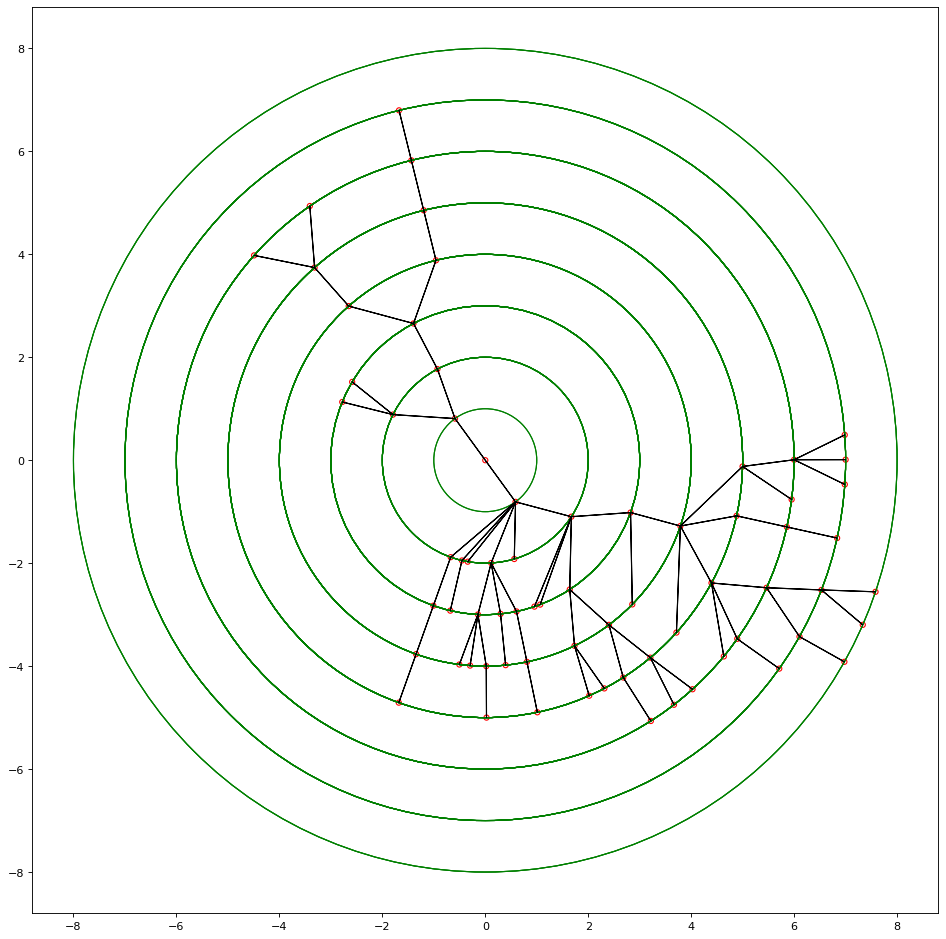

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

ax=plt.gca()
for x,y in zip(x_coord, y_coord):
  circle = plt.Circle((x_coord[x], y_coord[y]), 0.05, color='r', fill=False)
  ax.add_patch(circle)
 # ax.text(x_coord[x], y_coord[y], x, color='r')


for vert in vertexs:
  circle = plt.Circle((0,0), depth[vert], color='g', fill=False)
  ax.add_patch(circle)



for edge in edges:
  if (edges[edge]):
    for ex in edges[edge]:
      ax.arrow(x_coord[edge],y_coord[edge],-x_coord[edge]+x_coord[ex],-y_coord[edge]+y_coord[ex])
plt.axis('scaled')
plt.show()